# Neural Network Weight Optimization - Digit Recognition (MNIST)

Reference: https://mlrose.readthedocs.io/en/stable/source/tutorial3.html

## Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import time

## Load data (train and test)

In [2]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
# Convert the samples from integers to floating-point numbers
train_X, test_X = train_X / 255.0, test_X / 255.0
train_X = train_X.reshape(60000, 784)
test_X = test_X.reshape(10000, 784)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Prepare the data for model training

In [3]:
# One hot encode labels
one_hot = OneHotEncoder()
one_hot_train_y = one_hot.fit_transform(train_y.reshape(-1, 1)).todense()

## Optimize Neural Network weights by randomized optimization

In [4]:
# Construct neural network model and specify optimizer
algorithm = 'genetic_alg'  # CHNAGE ALGORITHM HERE
algorithm_specific_parameters = {
    'gradient_descent': {
        'max_iters': 100,
        'max_attempts': 10,
    },
    'random_hill_climb': {
        'max_iters': 1000,
        'max_attempts': 100,
        'restarts': 5,
    },
    'simulated_annealing': {
        'max_iters': 1000,
        'max_attempts': 100,
        'schedule': mlrose.ExpDecay(),
    },
    'genetic_alg': {
        'max_iters': 100,
        'max_attempts': 10,
        'pop_size': 200,
        'mutation_prob': 0.4,
    },
}
nn = mlrose.NeuralNetwork(
    # Common parameters
    algorithm=algorithm,
    hidden_nodes=[128],  # Besides hidden nodes, num of input nodes = 784 and num of output nodes = 10
    activation='relu',
    bias=True,
    is_classifier=True,
    learning_rate=0.0001,
    early_stopping=True,
    clip_max=5,
    random_state=0,
    curve=True,
    # Parameters specific to algorithm
    **algorithm_specific_parameters[algorithm]
)

In [5]:
# Fit to learn weights
start_time = time.time()
nn.fit(train_X, one_hot_train_y)
end_time = time.time()
print('Time elapsed (in seconds): {}'.format(end_time - start_time))
print('Minimized log loss (negative of fitness): {}'.format(np.min(-nn.fitness_curve)))

Time elapsed (in seconds): 7020.74126791954
Minimized log loss (negative of fitness): 26.72021463341105


In [6]:
# Predict and evaluate on train set
pred_y = nn.predict(train_X)
print('Train accuracy: {}'.format(accuracy_score(one_hot_train_y, pred_y)))

Train accuracy: 0.21603333333333333


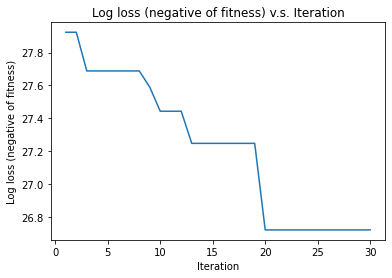

In [7]:
# Plot fitness curve
def plot_fitness_curve(fitness_curve):
    iters = list(range(1, len(fitness_curve) + 1))
    plt.plot(iters, fitness_curve)
    plt.title('Log loss (negative of fitness) v.s. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Log loss (negative of fitness)')
    plt.show()
    
plot_fitness_curve(-nn.fitness_curve)  # Note: mlrose derives fitness by flipping the sign of log loss

## Evaluate the model on the test set

In [8]:
# Predict and evaluate on test set
one_hot_test_y = one_hot.transform(test_y.reshape(-1, 1)).todense()
pred_y = nn.predict(test_X)
print('Test accuracy: {}'.format(accuracy_score(one_hot_test_y, pred_y)))

Test accuracy: 0.2111
